Utilizando o ret na frequência para filtrar o sinal de interesse

FREQUENCIA

PYTHON

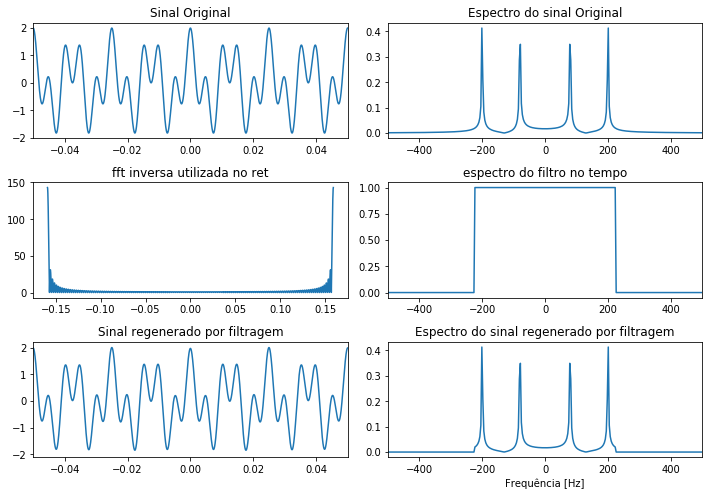

In [6]:
from scipy.fftpack import fft, fftshift, ifftshift,ifft
import numpy as np
from matplotlib import pyplot as plt
## Parâmetros da Sinc
B=100                                                      # Banda do filtro
Ts=1/(200*np.pi*B)                                         # Taxa de geração (Passo no tempo)
Fs=1/Ts                                                    # Frequência de amostragem
N=10000                                                    # Número de amostras
tf=N*Ts                                                    # Tempo final
t= np.arange(-tf,tf,Ts)                                    # Eixo do tempo
Am=2*Ts*B                                                  # Amplitude do sinal
s= Am*np.sinc(4.5*B*t)                                     # Sinc(W) possui fft  RET(W/2), devemos então garantir que tal filtro não interfira nas frequencias superiores do sinal gerado
#lfft = 10*t

m=np.cos(2*np.pi*200*t)+np.cos(2*np.pi*80*t)               # Sinal m(t)
## Convolução
#c=np.convolve(s,m)                                         # Calcula a convolução
#c = c[(len(t))//2:3*(len(t))//2]                           # Ajusta o tamanho do vetor (/2)
#print(m_fft)
## Espectros
lfft=len(s)                                                # Comprimento da FFT
ret=[]
for i in range(lfft):
  ret.append(int(i<((lfft/2)+lfft*Ts*2.25*B) and i>(((lfft)/2)-lfft*Ts*2.25*B)))
iret = ifft(ifftshift(ret))*lfft

S=fftshift(fft(s,lfft)/lfft)                               # Sinc S(f)
M=fftshift(fft(m,lfft)/lfft)                               # Sinal M(f)
C=M*ret                                                    # Sinal M(f) filtrado
c=ifft(ifftshift(C))*lfft
freq = np.arange(-Fs/2,Fs/2-Fs/lfft,Fs/lfft)               # Eixo da frequência
# Gráficos
plt.figure(1,[10,7])
plt.subplot(321)
plt.title("Sinal Original")
plt.plot(t,m)
plt.xlim([-0.05,0.05])
#
plt.subplot(322)
plt.title("Espectro do sinal Original")
plt.plot(freq,np.abs(M))
plt.xlim([-500,500])
#
plt.subplot(323)
plt.title("fft inversa utilizada no ret")
plt.plot(t,np.abs(iret))
#plt.xlim([-0.05,0.05])
#
plt.subplot(324)
plt.title("espectro do filtro no tempo")
plt.plot(freq,np.abs(ret))
plt.xlim([-500,500])
#
plt.subplot(325)
plt.title("Sinal regenerado por filtragem")
plt.plot(t,c)
plt.xlim([-0.05,0.05])
#
plt.subplot(326)
plt.title("Espectro do sinal regenerado por filtragem")
plt.plot(freq,np.abs(C))
plt.xlabel("Frequência [Hz]");
plt.xlim([-500,500])
#
plt.tight_layout(pad=1.1)
plt.show()


Utilizando o ret na frequência para filtrar o sinal de interesse

FREQUENCIA

MATLAB

In [ ]:
clear all;clc;close all;
%% Parâmetros da Sinc
B=100;                                                      % Banda do filtro
Ts=1/(200*pi*B);                                            % Taxa de geração (Passo no tempo)
Fs=1/Ts;                                                    % Frequência de amostragem
N=10000;                                                    % Número de amostras
tf=N*Ts;                                                    % Tempo final
t=-tf:Ts:tf;                                                % Eixo do tempo
lfft=length(t);                                             % Comprimento da FFT
Am=2*Ts*B;                                                  % Amplitude do sinal
%s= (4.5/2)*Am*sinc(4.5*B*t);                                % Sinc para reconstrução no tempo
m=cos(2*pi*200*t)+cos(2*pi*80*t);                           % Sinal m(t)
ret = zeros(1,length(t));
for i = 1:lfft
  ret(i) = ret(i) +(i<((lfft/2)+lfft*Ts*2.25*B) & i>(((lfft)/2)-lfft*Ts*2.25*B));
end
sinc = ifft(ifftshift(ret))*lfft;
%% Convolução
%c=conv(s,m);                                                % Calcula a convolução e realiza a filtragem no tempo
%c=c(1,(length(t)-1)/2:3*(length(t)-1)/2);                   % Ajusta o tamanho do vetor
%% Espectros de frequência
%S=fftshift(fft(s,lfft)/lfft);                               % Sinc S(f)
M=fftshift(fft(m,lfft)/lfft);                               % Sinal M(f) 
C=M.*ret;                                                   % Sinal M(f)
c=ifft(ifftshift(C))*lfft;
freq= -Fs/2:Fs/lfft:Fs/2-Fs/lfft;                           % Eixo da frequência

%% Gráficos 
% Plot do Sinal no tempo
fig = figure;
subplot(3,2,1);                                      
plot(t,m);
title('Sinal Original');
axis([-0.05 0.05 -2 2]);
% Plot do Sinal na frequência                   
subplot(3,2,2);
plot(freq,abs(M));        
title('Espectro do sinal Original');
axis([-800 800 0 0.5]);
%------------------------------------
% Plot do Filtro no tempo
subplot(3,2,3);                                      
plot(t,sinc);
title('Sinc usada para interpolação');
axis([-0.2 0.2 0 200]);
% Plot do Filtro na frequência                   
subplot(3,2,4);
plot(freq,abs(ret));       
title('Espectro da Sinc usada para interpolação');
axis([-400 400 0 2]);
%------------------------------------
% Plot da convolução no tempo                                
subplot(3,2,5);
plot(t,c);      
title('Sinal regenerado por filtragem');
xlabel('Tempo [s]');
axis([-0.05 0.05 -2 2]);
% Plot da convolução na frequência   
subplot(3,2,6);
plot(freq,abs(C));
title('Espectro do sinal regenerado por filtragem');
xlabel('Frequência [Hz]');
axis([-800 800 0 0.5]);

fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 9];

Ajustando Sinc para que, na frequência, não filtre parte do sinal mensagem.Uti

TEMPO

PYTHON


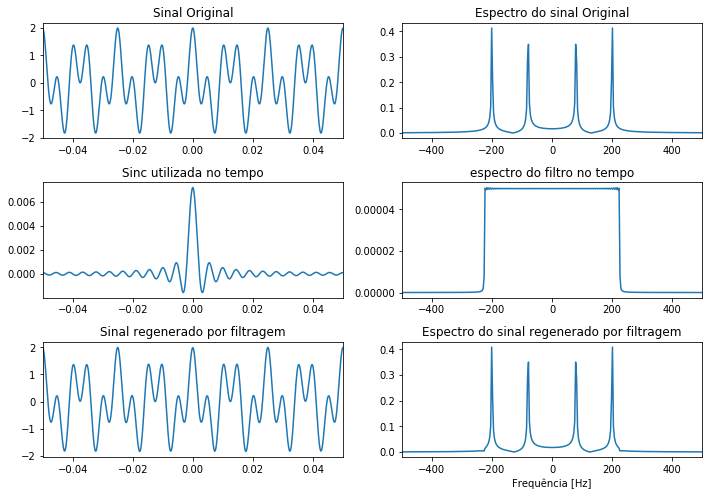

In [2]:
from scipy.fftpack import fft, fftshift, ifftshift,ifft
import numpy as np
from matplotlib import pyplot as plt
## Parâmetros da Sinc
B=100                                                      # Banda do filtro
Ts=1/(200*np.pi*B)                                         # Taxa de geração (Passo no tempo)
Fs=1/Ts                                                    # Frequência de amostragem
N=10000                                                    # Número de amostras
tf=N*Ts                                                    # Tempo final
t= np.arange(-tf,tf,Ts)                                    # Eixo do tempo
Am=2*Ts*B                                                  # Amplitude do sinal
s= (4.5/2)*Am*np.sinc(4.5*B*t)                                     # Sinc(W) possui fft  RET(W/2), devemos então garantir que tal filtro não interfira nas frequencias superiores do sinal gerado


m=np.cos(2*np.pi*200*t)+np.cos(2*np.pi*80*t)               # Sinal m(t)
## Convolução
c=np.convolve(s,m)                                         # Calcula a convolução
c = c[(len(t))//2:3*(len(t))//2]                           # Ajusta o tamanho do vetor (/2)
## Espectros
lfft=len(s)                                                # Comprimento da FFT

S=fftshift(fft(s,lfft)/lfft)                               # Sinc S(f)
M=fftshift(fft(m,lfft)/lfft)                               # Sinal M(f)
C=fftshift(fft(c,lfft)/lfft)                                                     # Sinal M(f) filtrado
freq = np.arange(-Fs/2,Fs/2-Fs/lfft,Fs/lfft)               # Eixo da frequência
# Gráficos
plt.figure(1,[10,7])
plt.subplot(321)
plt.title("Sinal Original")
plt.plot(t,m)
plt.xlim([-0.05,0.05])
#
plt.subplot(322)
plt.title("Espectro do sinal Original")
plt.plot(freq,np.abs(M))
plt.xlim([-500,500])
#
plt.subplot(323)
plt.title("Sinc utilizada no tempo")
plt.plot(t,s)
plt.xlim([-0.05,0.05])
#
plt.subplot(324)
plt.title("espectro do filtro no tempo")
plt.plot(freq,np.abs(S))
plt.xlim([-500,500])
#
plt.subplot(325)
plt.title("Sinal regenerado por filtragem")
plt.plot(t,c)
plt.xlim([-0.05,0.05])
#
plt.subplot(326)
plt.title("Espectro do sinal regenerado por filtragem")
plt.plot(freq,np.abs(C))
plt.xlabel("Frequência [Hz]");
plt.xlim([-500,500])
#
plt.tight_layout(pad=1.1)
plt.show()

In [3]:
Ajustando Sinc para que, na frequência, não filtre parte do sinal mensagem.Uti

TEMPO

MATLAB

SyntaxError: invalid syntax (<ipython-input-3-ff302046162a>, line 1)

In [ ]:
clear all;clc;close all;
%% Parâmetros da Sinc
B=100;                                                      % Banda do filtro
Ts=1/(200*pi*B);                                            % Taxa de geração (Passo no tempo)
Fs=1/Ts;                                                    % Frequência de amostragem
N=10000;                                                    % Número de amostras
tf=N*Ts;                                                    % Tempo final
t=-tf:Ts:tf;                                                % Eixo do tempo
Am=2*Ts*B;                                                  % Amplitude do sinal
s= (4.5/2)*Am*sinc(4.5*B*t);                                          % Sinc para reconstrução no tempo
m=cos(2*pi*200*t)+cos(2*pi*80*t);                           % Sinal m(t)

%% Convolução
c=conv(s,m);                                                % Calcula a convolução e realiza a filtragem no tempo
c=c(1,(length(t)-1)/2:3*(length(t)-1)/2);                   % Ajusta o tamanho do vetor
    
%% Espectros de frequência
lfft=length(s);                                             % Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft);                               % Sinc S(f)
M=fftshift(fft(m,lfft)/lfft);                               % Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft);                               % Sinal M(f) 
freq= -Fs/2:Fs/lfft:Fs/2-Fs/lfft;                           % Eixo da frequência

%% Gráficos 
% Plot do Sinal no tempo
fig = figure;
subplot(3,2,1);                                      
plot(t,m);
title('Sinal Original');
axis([-0.05 0.05 -2 2]);
% Plot do Sinal na frequência                   
subplot(3,2,2);
plot(freq,abs(M));        
title('Espectro do sinal Original');
axis([-800 800 0 0.5]);
%------------------------------------
% Plot do Sinc no tempo
subplot(3,2,3);                                      
plot(t,s);
title('Sinc usada para interpolação');
axis([-0.08 0.08 -1e-3 4e-3]);
% Plot do Sinc na frequência                   
subplot(3,2,4);
plot(freq,abs(S));       
title('Espectro da Sinc usada para interpolação');
axis([-400 400 0 6e-5]);
%------------------------------------
% Plot da convolução no tempo                                
subplot(3,2,5);
plot(t,c);      
title('Sinal regenerado por filtragem');
xlabel('Tempo [s]');
axis([-0.05 0.05 -2 2]);
% Plot da convolução na frequência   
subplot(3,2,6);
plot(freq,abs(C));
title('Espectro do sinal regenerado por filtragem');
xlabel('Frequência [Hz]');
axis([-800 800 0 0.5]);

fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 9];

Colocando SQNR nos graficos 

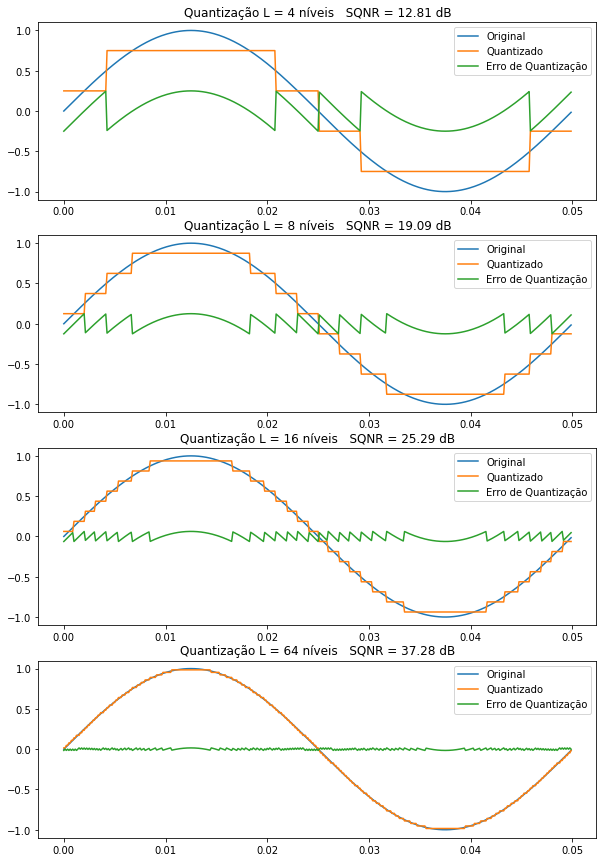

In [64]:
import numpy as np
import matplotlib.pyplot as plt
fs=8000                                              # Frequência de amostragem
Ts=1/fs                                              # Período de amostragem
fm=20                                                # Frequência da onda
Tm=1/fm                                              # Período de amostragem
t= np.arange(0,Tm,Ts)                                # Eixo do tempo
m_t=np.sin(2*np.pi*fm*t)                             # Sinal m(t)
Power1 = np.var(m_t)
L= [ 4, 8, 16, 64 ];                                 # Níveis de quantização
sig_max=max(m_t)                                     # Encontra pico máximo
sig_min=min(m_t)                                     # Encontra pico mínimo
plt.figure(1,[10,15])
# Quantização com round() para cada nível de quantização especificado
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp //= Delta

    qindex = sigp.astype(int)     #Forçamos o tipo do array como int para usar seus valores como índices
    qindex[qindex >= Li] = Li-1   #Trunca o excedente de qindex
    q_out = q_level[qindex] #Distribui os níveis de cada elemento
    m1_t=m_t-q_out
    Power2 = np.var(m1_t)
    SQNR=10*np.log10(Power1/Power2)


    ## Plotting
    plt.subplot('{}1{}'.format(len(L),il+1))
    plt.plot(t,m_t,t,q_out,t,(m_t-q_out))
    plt.title('Quantização L = {} níveis   SQNR = {:.2f} dB'.format(Li,SQNR))
    plt.legend(["Original", "Quantizado", "Erro de Quantização"])

plt.show()


Número aproximado de níveis para obter um SQNR de 48.5 dB

In [65]:
import numpy as np

SQNR1 = 48.5
L = np.sqrt(10**(SQNR1/10)*(4/3))
print('o numero aproximado de niveis necessarios para obter um SQNR de 48.5 dB é de {:.2f} '.format(L))

o numero aproximado de niveis necessarios para obter um SQNR de 48.5 dB é de 307.23 


Quantizando o Sinal produzildo pelo arquivo Amostragem.mat (Prática 1) em diferentes níveis de quantização L=[8, 32, 128]

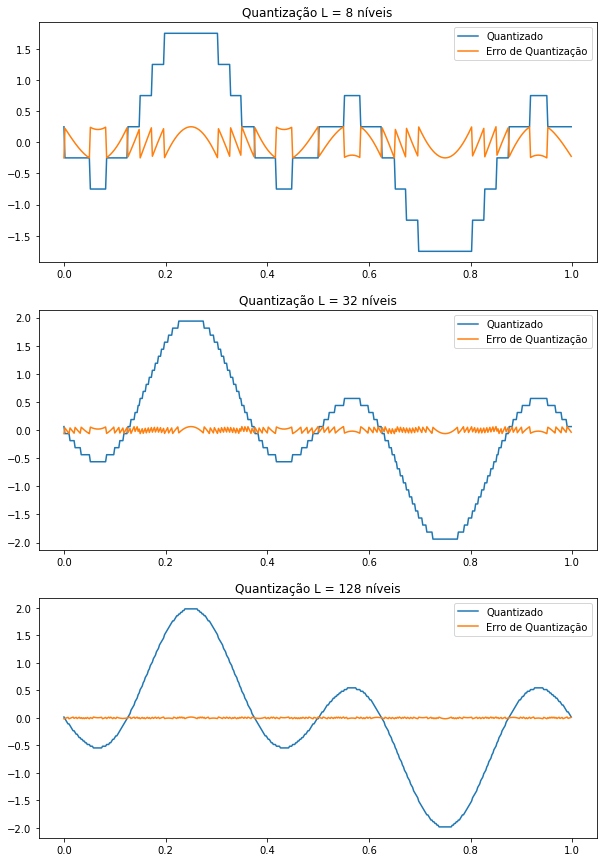

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io

mat = scipy.io.loadmat('Amostragem.mat')


t = mat['t'].flatten()
m_t = mat['m_t'].flatten()
L = [8, 32, 128]
sig_max=max(m_t)                                     # Encontra pico máximo
sig_min=min(m_t)
plt.figure(1,[10,15])
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp //= Delta

    qindex = sigp.astype(int)     #Forçamos o tipo do array como int para usar seus valores como índices
    qindex[qindex >= Li] = Li-1   #Trunca o excedente de qindex
    q_out = q_level[qindex] #Distribui os níveis de cada elemento

    ## Plotting
    plt.subplot('{}1{}'.format(len(L),il+1))
    plt.plot(t,q_out,t,(m_t-q_out))
    plt.title('Quantização L = {} níveis'.format(Li))
    plt.legend([ "Quantizado", "Erro de Quantização"])

plt.show()


In [ ]:
##pratica 6

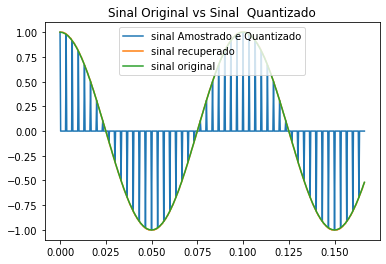

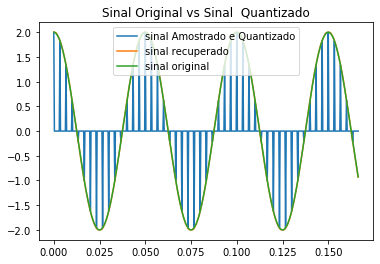

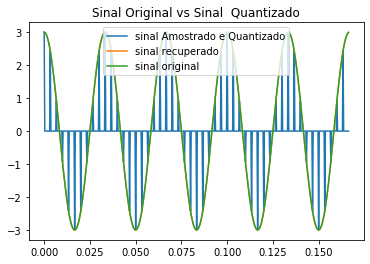

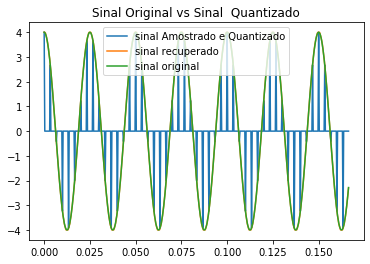

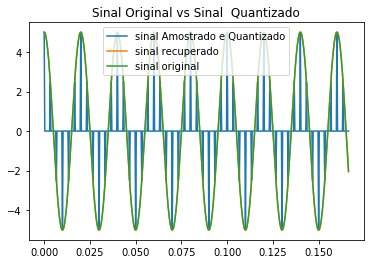

In [77]:
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
import scipy.fftpack as ff

# Como visto anteriormente, para economizar linhas de código, uma boa prática é resumir a conversão
# binário/decimal em duas funções:

def downsample(array,rate):
    return array[::rate]

def upsample(array,rate):
    from numpy import zeros
    ret =  zeros(rate*len(array))
    ret[::rate] = array 
    return ret


def de2bi(sinal):
    from numpy import fromiter,binary_repr,round
    sinal_bin = round(sinal).astype(int)
    return fromiter(map(binary_repr,sinal_bin),dtype=int)
#
def bi2de(sinal):
    from numpy import ndarray
    sinal_dec = ndarray(len(sinal),dtype=int)
    for i in range(len(sinal_dec)):
        sinal_dec[i] = int(str(sinal[i]),2)
    return sinal_dec

def quantizacao(sinal,n):
    L = 2**n
    sig_max = max(sinal)
    sig_min = min(sinal)
    Delta=(sig_max-sig_min)/L                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)
    sigp=sinal-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp //= Delta

    qindex = sigp.astype(int)     #Forçamos o tipo do array como int para usar seus valores como índices
    qindex[qindex >= L] = L-1   #Trunca o excedente de qindex
    return q_level[qindex]*L

mat = scipy.io.loadmat('Pacientes.mat')

fs = mat['Fs'].flatten()
ts = 1/fs
sinal_1 = mat['sinal_1'].flatten()
sinal_2 = mat['sinal_2'].flatten()
sinal_3 = mat['sinal_3'].flatten()
sinal_4 = mat['sinal_4'].flatten()
sinal_5 = mat['sinal_5'].flatten()
Tf = ts*len(sinal_1)
t= np.arange(0,Tf,ts)

##amostragem
sinal_1_A = downsample(sinal_1,10)
sinal_1_A = upsample(sinal_1_A,10)
sinal_2_A = downsample(sinal_2,10)
sinal_2_A = upsample(sinal_2_A,10)
sinal_3_A = downsample(sinal_3,10)
sinal_3_A = upsample(sinal_3_A,10)
sinal_4_A = downsample(sinal_4,10)
sinal_4_A = upsample(sinal_4_A,10)
sinal_5_A = downsample(sinal_5,10)
sinal_5_A = upsample(sinal_5_A,10)



sinal_1_quant = quantizacao(sinal_1,8)
sinal_2_quant = quantizacao(sinal_2,8)
sinal_3_quant = quantizacao(sinal_3,8)
sinal_4_quant = quantizacao(sinal_4,8)
sinal_5_quant = quantizacao(sinal_5,8)

sinal_1_quant = de2bi(sinal_1_quant)
sinal_2_quant = de2bi(sinal_2_quant)
sinal_3_quant = de2bi(sinal_3_quant)
sinal_4_quant = de2bi(sinal_4_quant)
sinal_5_quant = de2bi(sinal_5_quant)

frameSize = 5;                            # Tamanho do quadro (número máximo de sinais a serem multiplexados)
mux_sig = np.zeros(len(sinal_1_quant)*frameSize,dtype=int)

for i in range(1,len(sinal_2_quant)+1):
    mux_sig[5*(i-1)]      =   sinal_1_quant[i-1]  # Indexação em python começa em 0
    mux_sig[5*(i-1)+1]    =   sinal_2_quant[i-1]
    mux_sig[5*(i-1)+2]    =   sinal_3_quant[i-1]
    mux_sig[5*(i-1)+3]    =   sinal_4_quant[i-1]
    mux_sig[5*(i-1)+4]    =   sinal_5_quant[i-1]

####  FIM DA MULTIPLEXACAO
####  DEMULTIPLEXACAO
demux_01 = np.zeros(len(sinal_1_quant),dtype=int)
demux_02 = np.zeros(len(sinal_1_quant),dtype=int)
demux_03 = np.zeros(len(sinal_1_quant),dtype=int)
demux_04 = np.zeros(len(sinal_1_quant),dtype=int)
demux_05 = np.zeros(len(sinal_1_quant),dtype=int)
for i in range(1,len(sinal_1_quant)):
    demux_01[i-1]= mux_sig[(i-1)*5 ]
    demux_02[i-1]= mux_sig[(i-1)*5 + 1]
    demux_03[i-1]= mux_sig[(i-1)*5 + 2]
    demux_04[i-1]= mux_sig[(i-1)*5 + 3]
    demux_05[i-1]= mux_sig[(i-1)*5 + 4]
sig_rec01 = bi2de(demux_01)
sig_rec02 = bi2de(demux_02)
sig_rec03 = bi2de(demux_03)
sig_rec04 = bi2de(demux_04)
sig_rec05 = bi2de(demux_05)
plt.figure
plt.plot(t[:500],sinal_1_A[:500],t[:500],sig_rec01[:500]/(max(sig_rec01)/max(sinal_1)),t[:500],sinal_1[:500])
plt.title("Sinal Original vs Sinal  Quantizado")
plt.legend(['sinal Amostrado e Quantizado','sinal recuperado','sinal original'],loc=9)
plt.show()


plt.figure
plt.plot(t[:500],sinal_2_A[:500],t[:500],sig_rec02[:500]/(max(sig_rec02)/max(sinal_2)),t[:500],sinal_2[:500])
plt.title("Sinal Original vs Sinal  Quantizado")
plt.legend(['sinal Amostrado e Quantizado','sinal recuperado','sinal original'],loc=9)
plt.show()

plt.figure
plt.plot(t[:500],sinal_3_A[:500],t[:500],sig_rec03[:500]/(max(sig_rec03)/max(sinal_3)),t[:500],sinal_3[:500])
plt.title("Sinal Original vs Sinal  Quantizado")
plt.legend(['sinal Amostrado e Quantizado','sinal recuperado','sinal original'],loc=9)
plt.show()

plt.figure
plt.plot(t[:500],sinal_4_A[:500],t[:500],sig_rec04[:500]/(max(sig_rec04)/max(sinal_4)),t[:500],sinal_4[:500])
plt.title("Sinal Original vs Sinal  Quantizado")
plt.legend(['sinal Amostrado e Quantizado','sinal recuperado','sinal original'],loc=9)
plt.show()

plt.figure
plt.plot(t[:500],sinal_5_A[:500],t[:500],sig_rec05[:500]/(max(sig_rec05)/max(sinal_5)),t[:500],sinal_5[:500])
plt.title("Sinal Original vs Sinal  Quantizado")
plt.legend(['sinal Amostrado e Quantizado','sinal recuperado','sinal original'],loc=9)

plt.show()
